# Chainer Tutorial Bookへようこそ!

Chainer Tutorial Book（CTB）では次のことをオンラインで学べます

* ディープラーニングの基礎知識
* Chainerを使ったディープラーニングの開発

CTBではユーザーは実際にコードを書いて実行しながらディープラーニングを学べます。

CTBは複数の章から構成されています。
前から順番に読むことをお勧めしますが一部分だけ知りたい場合は先に読み進めても大丈夫です。

それではさっそくはじめていきましょう。

## ヒント

数学の専門知識が必要な話題についてはセクション名の後に*がついています。
このセクションは読み飛ばしても大丈夫ですが，読むことで理解が深まります。

まずは下のブロックを実行してChainerとCupyをインストールしましょう。

In [1]:
!apt -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!pip install -q cupy-cuda80 chainer

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libcusparse8.0 libnvrtc8.0 libnvtoolsext1
0 upgraded, 3 newly installed, 0 to remove and 6 not upgraded.
Need to get 28.9 MB of archives.
After this operation, 71.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libcusparse8.0 amd64 8.0.61-1 [22.6 MB]
Get:2 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libnvrtc8.0 amd64 8.0.61-1 [6,225 kB]
Get:3 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libnvtoolsext1 amd64 8.0.61-1 [32.2 kB]
Fetched 28.9 MB in 1s (16.3 MB/s)

78Selecting previously unselected package libcusparse8.0:amd64.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../libcusparse8.0_8.0.61-1_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [  6%] [###..

# Chainer Tutorial Bookについて

はじめに，Chainer Tutorial Book (CTB）の仕組みについて簡単に紹介します。

CTBは，Goggleが提供しているColaboratoryというウェブサービスを利用しています。

このウェブサービスはJupyter Notebookをウェブサービス化したものであり、環境構築などをせず直ぐにNotebookを実行することができます。

さっそく下のコードを実行してみましょう。
下のブロックをクリックしたあと、Shift+Enterで実行することができます。
プログラムは自由に編集可能です。プログラムを編集した後に再度実行すると編集後のプログラムを実行できます。

In [2]:
import chainer
import numpy as np

print("Hello World!")
print(chainer.__version__)
print(355.0 / 113.0)
print(np.eye(5))

total = 0
for i in range(10):
    total += i

print(total)

Hello World!
4.2.0
3.1415929203539825
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
45


# 機械学習

ニューラルネットワークを含む多くの機械学習における学習タスクは最適なパラメータを探す問題です。
最適なパラメータは目的関数の最小化（最大化）問題を解くことで自動的に得られます。

一般に何かを学習させたいという場合は次のステップからなります。

1. 学習対象のモデルを定義する
2. 目的関数を定義する
3. 目的関数を最適化することで，モデルを学習する

これらを順番にみていきましょう。

# 1. 学習対象のモデルを定義する (1)

はじめに学習対象のモデルを定義します。

ここでは，学習対象のモデルはいくつかのパラメータを使った関数だとします。
Pythonプログラムでいうと，学習対象のモデルはクラスのメソッドであり，パラメータはメンバ変数（インスタンス）のようなものです。

例えば次のクラスFはパラメータ $a$ と $b$ を持ち，関数としては $ax + b$を表します。
この関数の挙動はパラメータ $a$ と $b$ を変えることで変わります。

```
class F(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def __call__(self, x):
        return self.a * x + self.b

f = F(2.0, -1.0)
print(f(1.0)) # 1.0
print(f(2.0)) # 3.0
```


同様に，学習対象のモデルも複数のパラメータを持ち，それらパラメータを調整することで望むような挙動をするようにさせます。

## パラメトリックモデル(*)

このようなパラメータで特徴づけられたモデルをパラメトリックモデルとよびます。
例えば，パラメータ $\theta$ で特徴付けられた関数は $y=f(x; \theta)$ です。
この関数の挙動がパラメータ $\theta$ で変わることを示すために，引数とは違って $;\theta$ と表します。

## 課題

上記例を $f(1) = 5$、$f(2) = 8$となるようにaとbを調整し，

```
f = F(2.0, -1.0)
```

を書き換えてください。
（つまり，あなた自身でモデルを学習させてください）

In [3]:
class F(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def __call__(self, x):
        return self.a * x + self.b


f = F(2.0, -1.0)
print(f(1.0))  # 1.0
print(f(2.0))  # 3.0

1.0
3.0


# 1. 学習対象のモデルを定義する (2)

Chainerでは学習可能なモデルをLinkとよびます。

ディープラーニングで利用される代表的なLinkは `chainer.links` でサポートされています。
また，自分で新しいLinkを作ることもできます。

以降では，この `chainer.links` を `L` として使えるようにします。


```
from chainer import links as L
```

もっと基本的なLinkはLinearとよばれるLinkです。
Linearは全ての入力と出力がつながっているようなニューラルネットワークを表します。
Linearはニューラルネットワークの文脈では全結合層，数学の用語では線形変換，アフィン変換とよびます。
たとえば，次の例では5個のユニットから，2個のユニットへの変換を表します。

```
lin = L.Linear(5, 2)
```

この `lin` はLinkオブジェクトですが，次のように関数呼び出しをすることができます。
（この関数呼び出しは `__call__` で定義されており，演算子オーバーロードで実現されています。）

```
import numpy as np
from chainer import Variable

lin = L.Linear(5, 2)
x = Variable(np.ones((3, 5), dtype=np.float32))
y1 = lin(x)
```

この `numpy` ， `Variable` については後で詳しく説明します。
この例である`np.ones((3, 5), dtype=np.float32)` は3行5列で全ての値が1であるような行列を作ります。
`Variable` はその値に加えて学習に必要な情報が埋め込まれているオブジェクトとだけ覚えてください。
つまりここでは3個の5次元のベクトルを用意し，それをVariableというオブジェクトにセットし，
それを `lin` の引数として与えて，出力を `y` として計算しています。
`lin`は5次元の入力を2次元の出力へ変換する関数なので，`y`は3個の2次元のベクトルになります。


## 線形変換，アフィン変換 (*)

線形変換（アフィン変換）は次のように表される変換です。

$$
\begin{align}
f(x; θ) &= Wx + b \\
θ &= (W, b)
\end{align}
$$

例えば上記例のLinearは，5次元のベクトルから2次元のベクトルへの線形変換を表します。

# 課題

上記の例で，出力を4次元にし，それを出力してください。


In [4]:
from chainer import functions as F
from chainer import links as L
from chainer import Variable
import numpy as np


lin = L.Linear(5, 2)
x = Variable(np.ones((3, 5), dtype=np.float32))
y1 = lin(x)

print(x.data)
print(y1.data)

y2 = F.relu(x)
y3 = F.relu(lin(x))

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[-0.12078336 -2.4637902 ]
 [-0.12078336 -2.4637902 ]
 [-0.12078336 -2.4637902 ]]



# 1. 学習対象のモデルを定義する (3)

Chainerでもう一つ重要なオブジェクトとしてFunctionがあります。
FuncitonはLinkとは違って，学習可能なパラメータを持ちません。
つまり，学習によって挙動を変えません。

ディープラーニングで利用されている代表的な関数は `chainer.functions` で定義されています。
また，自分で新しいFunctionを作ることもできます。

以降では，この  `chainer.functions` をFとして使えるようにします。

```
from chainer import functions as F
```

例えば，ディープラーニングでよく使われるReLUとよばれる非線形関数 $f_{relu}$ は

$$f_{relu}(x)=max(x,0)$$

で定義されます。
つまり，もし $x$ が $0$ よりも大きければ $x$ をそのまま返し，もし小さければ $0$ を返すような関数です。

Chainerでは次のように記述できます。

```
from chainer import functions as F
...
y2 = F.relu(x)
```

これらのLinkとFunctionを組みわせて複雑な関数を作ることができます。
例えば，前回の例のLinearを適用した後にReLUを適用した結果は次のように計算されます。

```
y3 = F.relu(lin(x))
```

## 課題

ReLUと並んで重要な非線形関数として，sigmoidがあります。
例をsigmoidに変えて，その結果を表示してください。

[関数一覧](http://docs.chainer.org/en/stable/reference/functions.html)

In [5]:
from chainer import functions as F
from chainer import links as L
from chainer import Variable
import numpy as np


lin = L.Linear(5, 2)
x = Variable(np.ones((3, 5), dtype=np.float32))
y1 = lin(x)

y2 = F.relu(lin(x))
print(y2.data)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


# 1. 学習対象のモデルを定義する (4)

これまで扱ったLinkとFunctionを組み合わせて，学習対象のモデルを実際に作ってみましょう。

以下に三層からなるニューラルネットワークの例をあげます。

```
class MLP(chainer.Chain):

    def __init__(self, n_units, n_out):
        super(MLP, self).__init__()
        with self.init_scope():
            # the size of the inputs to each layer will be inferred
            self.l1 = L.Linear(None, n_units)  # n_in -> n_units
            self.l2 = L.Linear(None, n_units)  # n_units -> n_units
            self.l3 = L.Linear(None, n_out)    # n_units -> n_out

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)
```

各機能は今後詳細に説明されますので，ここでは概要だけ説明します。
詳細は理解できなくてもそのまま飛ばして問題ありません。

このMLPは，三つのLinear（l1, l2, l3）を学習可能なパラメータとして持ち，`__call__`でそれらのパラメータを利用して結果を計算します。

なお，`L.Linear` の第一引数には `None` を指定することで実際の入力からユニット数を自動で設定してくれます。

`__call__` では先ほど定義した層に入力`x`を与えて計算（順計算）を行います。
まず `l1` に大元の入力 `x` を与え，それをLinearで変換したものにReLUを適用します。
その計算結果 `h1` を次の層 `l2` に与え同様の計算を行います。
`l3` に関しても同様に前層の結果を元に計算を行います。
最終的に `l3` の結果を返すことで計算が完了します。

このように，(1)Linkを使って学習対象のパラメータを定義し，(2)次にそれらを使って順計算を定義することで学習対象のモデルを定義できます。

In [8]:
import chainer
from chainer import functions as F
from chainer import links as L
from chainer import Variable
import numpy as np


class MLP(chainer.Chain):

    def __init__(self, n_units, n_out):
        super(MLP, self).__init__()
        with self.init_scope():
            # the size of the inputs to each layer will be inferred
            self.l1 = L.Linear(None, n_units)  # n_in -> n_units
            self.l2 = L.Linear(None, n_units)  # n_units -> n_units
            self.l3 = L.Linear(None, n_out)    # n_units -> n_out

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)


model = MLP(5, 2)

x = Variable(np.ones((3, 5), dtype=np.float32))
y = model(x)

# 2. 目的関数を定義する (1)

次に目的関数を定義します。

目的関数は何を学習させたいのかを表す関数です。
目的関数は一つの値を出力し，値が小さければ望ましい状態を表すような関数です。

例えば，訓練データに対し学習対象モデルが予測をし，間違えた回数を $L$ とします。

この間違えた回数 $L$ を小さくするということは，学習対象モデルが訓練データをたくさん当てられるようにすることを意味します。

この場合，目的関数は学習対象モデルを引数として受取り，間違えた数を返すような関数です。

次から，代表的な学習問題である分類教師あり学習の目的関数を例に考えていきます。

# 2. 目的関数を定義する (2)

分類とは入力 $x$ から出力 $y \in \{ 1, ..., k \}$ を推定する問題です。出力はラベルと呼ばれます。
例えば，画像からそこに写っている動物を推定したい場合では，入力 $x$ が画像であり，出力 $y$ がそのラベル（猫，犬など）となります。

# 2. 目的関数を定義する (3)

今回，学習したいモデルは入力 $x$ が与えられた時に出力 $y$ の条件付き確率 $p(y \mid x)$ を出力してくれるようなモデルです。

例えば，入力$x$に犬が写っていれば $p(犬 \mid x) = 0.99, p(猫 \mid x) = 0.01$ となるようなモデルです。

このようなカテゴリ値（離散値）に対する確率分布をモデル化するにはSoftmaxを利用します。

Chainerでは `chainer.functions` で `softmax` 関数が定義されているのでそれを使いましょう。

例えば，入力`x`を何らかのモデルで変換しカテゴリ種類数と同じ次元数を持つベクトル`t`を作ります。
次に（必ずしも確率分布となっていない）ベクトル`t`を`softmax`を使って確率分布に変換します。

```
t = model(x)
y = F.softmax(t)
```

## Softmax　(*)

Softmax（または多クラスロジスティックスモデル）とは $d$ 次元の実数値ベクトルから，
$d$ 次元の確率分布を作る方法の一つです。

softmaxは，$x$ が $d$ 次元であり，各次元の値が $x[0], x[1], ..., x[d-1]$ の時，

$$y[i]=\frac{\exp(x[i])}{\sum_j \exp(x[j])}$$

と表されます。

あるベクトルvが確率分布となる条件として，

1. 各次元の値が非負
2. 合計値が1

という条件があります。
Softmaxは， $\exp$ が非負であることから1の条件を満たし，各次元の値を足した値で割っていることから2の条件を満たします。

# 2. 目的関数を定義する (4)

学習を行うために，入力と正解の出力のペアからなる $n$ 個の学習データ

$$D = \{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}$$

を用意します。

この学習データと，学習対象のモデルが一致するように，つまり学習データそれぞれ $(x_i, y_i)$ に対し， $p(y_i \mid x_i)$ が大きい時に，値が小さくなるような目的関数を用意します。

ここでは代表的な関数である`softmax_cross_entropy`とよばれる関数を使います。

```
# x は入力, tは正解の出力
h = MLP(x)
loss = F.softmax_cross_entropy(h, t)
```

ChainerではSoftmaxを適用した後に，クロスエントロピー損失関数を適用した目的関数が用意されています。
これは，二つまとめて処理をしないと，数値誤差の問題があるためです。


## クロスエントロピー損失関数 (*)

学習の目標は学習データ$D$の確率分布 $p(y|x)$ と，学習対象のモデルによる確率分布 $q(y \mid x; \theta)$ が一致するようにすることです。
確率分布間がどれだけ離れているかを表す指標としてKLダイバージェンスが知られています。
KLダイバージェンスは二つの確率分布 $P$ と $Q$ の遠さを次のように定義します。

$$
\begin{align}
KL(P \mid\mid Q) &= \sum_x P(x) \log \frac{P(x)}{Q(x)} \\
                 &= \sum_x P(x) \log P(x) - \sum_x P(x) \log Q(x)
\end{align}
$$

もし， $P$ と $Q$ が同じならば，全ての $x$ について $\frac{P(x)}{Q(x)}=1$ となるので $KL(P \mid\mid Q)=0$ となります。
この二つの分布が違うと， $KL(P \mid\mid Q)>0$ となり，近ければ近いほど0に近づくような指標です。

学習データによって定義される確率分布は訓練分布と呼ばれ，それに基づく条件付き確率は

$$
\begin{align}
P(y \mid x) &= \frac{P(x, y)}{P(x)} \\
            &= \frac{\sum_{i}I(x=x_i, y=y_i)}{\sum_{i}I(x=x_i)}
\end{align}
$$

と表されます。
但し， $I$ はデルタ関数とよばれ， $I(c)$ は $c$ が真である時は $1$，それ以外は $0$ であるような関数です。


訓練分布に基づく条件づき確率 $P(y \mid x)$ と，モデルによる条件づき確率 $Q(y \mid x)$ のKLダイバージェンスは

$$
\begin{align}
KL(P \mid\mid Q) &= \sum_{x} \sum_y P(y \mid x) \log \frac{P(y \mid x)}{Q(y \mid x)} \\
                 &= \sum_{x, y} P(y \mid x) \log P(y \mid x) - \sum_{x, y} P(y \mid x) \log Q(y \mid x)
\end{align}
$$

となります。
この最適化において， $Q$ に依存する項は第二項のみであり， $(x, y) \in D$ の時 $P(y \mid x)=1$ ，それ以外 $0$ ですので

$L(\theta) = - \sum_{i=1}^n \log Q(y_i \mid x_i)$

となります。
これをクロスエントロピー損失関数，または負の対数尤度ともよばれます。

ここまで読んだ方で，なぜ学習データ $D$ から得られた確率分布 $P$ そのものを直接使わず，学習モデルによる確率 $Q$ を使うのかと思った方がいるかもしれません。
それは，学習の目標は学習データだけをうまく分類することではなく未知のデータをうまく分類することだからです。

$P$ は，入力が学習データと全く同じであればそれが正解となりますが，そうでない場合は確率分布が不定になりえます。
$Q$ はありえそうなモデルの中で一番 $P$ に近い分布を探しています。
$Q$ は $P$ とは違って全ての $x$ について確率分布を与えることができるため，学習データには含まれない未知のデータでもうまく分類できます。
別の言い方をすると$P$を平滑化した確率分布が$Q$となります。

# 2. 目的関数を定義する (5)

また，推定する値が連続値である回帰問題の場合は次の二乗誤差を使います

$$\|y - f(x)\|^2$$

これは，Chainerでは `mean_squared_error` として用意されています。

```
loss = F.mean_squared_error(h, t)
```

損失関数のいくつかは `chainer.functions` 内で定義されています。
また，自分で新しい損失関数を定義することもできます。

得られた目的関数 $L(\theta)$ は学習対象のモデルのパラメータ $\theta$
によって値が決まる関数であることに注意してください。
この目的関数は，学習データをうまく分類できるような確率分布に対応するパラメータであれば小さい値をとり，そうでない場合は大きな値をとるような関数です。

これにより，学習という問題を目的関数を最小化する最適化問題に変換することができました。

この目的関数をどのように小さくするかは次章で扱います。

## 課題 (*)

なぜ，確率分布の場合，二乗誤差ではなくクロスエントロピー損失関数を使うのか考えてみてください

# 3. 目的関数を最適化することで，モデルを学習する (1)

ここまで学習対象のモデルを定義し，目的関数を定義してきました。

この目的関数を使って，最適なパラメータを探す作業が最適化です。

最適化問題は，パターゴルフのような問題とみなすことができます。
現在の変数 $x$ が位置に対応し，関数の値 $F(x)$ が高さに対応します．
最適化の目標は最も低い位置を探すことです。


## 最適化問題 (*)

一般に関数 $f(x)$ について， $f(x)$ を最小化するような $x$ 求める問題を最適化問題とよびます。

例えば，1次元変数$x$について，

$$f(x)=x^2 + 4x - 7$$

という目的関数は

$$f(x)=(x+2)^2 - 11$$

であることから $x=-2$ が最小値を達成する変数であり，その時の最小値は $(-2+2)^2 - 11 = -11$ となります。



# 3. 目的関数を最適化することで，モデルを学習する (2)

この最適化問題を解くために，次のような戦略をとります。

1. 現在の位置 $x_t$ から目的関数の値が最も急激に下がりそうな方向を調べる

    * この方向を勾配と呼び，$-v_t$ と書きます。

2. その勾配にしたがって現在の位置から少し動かす: $x_{t+1} = x_t - \alpha_t v_t$

    * この時のステップ幅 $\alpha_t > 0$ を更新律と呼びます。

3. 1. 2.を関数の値が変わらなくなるまで繰り返す

このような最適化手法を勾配降下法と呼びます。

勾配降下法において，最も大変なのが勾配 $v_t$ の推定です。
実際のパターゴルフのような三次元の世界では，一番急激に下っている方向を探すのは簡単です。
一方，ディープラーニングの場合は一番急激に下がっている方向を探すために，誤差逆伝播法（back propagation）を利用し推定します。
誤差逆伝搬法の計算量は順計算の計算量とほぼ同じであり効率的に勾配を求めることができます。


## 誤差逆伝播法(*)

出力から入力に向かって，目的関数の出力についての勾配を伝播させていくことで効率的に勾配を求めることができます。

# 3. 目的関数を最適化することで，モデルを学習する (3)

Chainerは誤差逆伝播法を使った勾配計算を標準でサポートしており，任意の順計算について誤差逆伝搬法を使って勾配を求めることができるようになっています。
`chainer.Variable` はこの誤差逆伝搬法を実現するために必要な情報を記録する仕掛けが入っています。

ユーザーが `Variable` を変数として順計算の計算手順を書いている時，Chainerは後で誤差逆伝播法ができるように内部で計算グラフを構築しています。

例えば，前回の `loss` を目的関数とした場合，途中のパラメータ，入力についての勾配は， `backward` という関数を呼び出すことで求めることができます。

```
loss.backward()
```

勾配情報はこの `loss` の計算に関わった全ての `Variable`, `Link` の `grad` 属性に格納されます。

# 3. 目的関数を最適化することで，モデルを学習する (4)

勾配情報に基づきパラメータを更新する手法が `chainer.optimizers` にサポートされています。

```
from chainer import optimizers
```

代表的な最適化手法はSGD, RMSprop, Adamなどです。

```
opt = optimizers.Adam()
opt.setup(model)
```

最適化エンジンがどの学習可能な関数を目標とするかは `setup` で設定します。
そして，勾配を求めて，その勾配情報を元に最適化します。

```
loss.backward()
opt.update()
```

誤差逆伝搬法は強力で多くの関数の勾配を正確にかつ高速に求めることができます。
そのため，非常に多くのパラメータを持つモデルの場合でも効率的に学習することができます


# 3. 目的関数を最適化することで，モデルを学習する (5)

誤差逆伝播法で勾配が求められるので，これを使って目的関数の最適化ができますが，問題が一つあります。
目的関数 $L(\theta)$ の勾配 $v(\theta)$ は，目的関数の定義からデータ全てを調べないと求められません。
しかし，毎回勾配を求めるたびにデータを全て調べるのは計算コストが大きすぎます。
そのため，データ全体を使わずにデータの一部だけを利用し勾配の推定値を求め，
それを利用しパラメータを更新します。これを確率的勾配降下法（SGD）とよびます。

パターゴルフで例えるなら，大体こっちの方向が下ってそうだとわかったら，方向を細かく決めずにさっさと打ってしまう方法です。一回打つまでの時間が少なくてすむため単位時間あたりにより多くの回数打つことができ，真面目に方向を定めるより効率よく下ることができます。

この勾配推定に使うためにサンプリングされた学習データをミニバッチとよび，その個数をミニバッチサイズBとします。
ミニバッチサイズは例えば32〜1024程度の値が利用されます。

# 確率的勾配降下法の利点 (*)

勾配降下法には次の二つの問題があります。
一つ目は最適解ではなく局所解に収束してしまう，つまり本当に一番小さい値ではないがその周辺からみると小さい値に収束してしまう問題です。パターゴルフでいえば途中でくぼみがありそこにはまってしまうことに相当します。
二つ目はプラトーと呼ばれる平坦な領域にはまってしまう問題です。例えば平面のような場所では勾配が非常に小さく本当は平面の先にもっと良い解があったとしても，止まってしまう問題があります。

SGDは勾配の推定値を使って更新していくため，常に変数は推定によるノイズの影響である程度ランダムに動き続けます。
このランダムに動くことによって，局所解やプラトーから抜け出すことができます。

# 機械学習のまとめ

これまで機械学習の手順についてみてきました。ここでおさらいしましょう。

1. 学習対象のモデルを定義する

    学習可能なパラメータを持つ関数をLinkとよび，関数をFunctionとよびます。
    学習対象のモデルはLinkとFunctionを組みわせて定義します。

2. 目的関数を定義する

    学習する目標を目的関数で表します。
    目的関数を最小化することで学習が実現されるように目的関数を定義します。
    目的関数は学習対象のモデルとそれを評価する関数によって定義できます。
    代表的な評価関数として，分類に対する `softmax_cross_entropy`，
    回帰に対する `mean_squared_error` があります。

3. 目的関数を最適化することで，モデルを学習する

    勾配降下法を利用し，目的関数を最小化するようなパラメータを求め，結果として学習を実現します。
    この勾配は誤差逆伝播法を利用し効率よく求められます。
    誤差逆伝播法は得られた損失の値に対し `backward()` を呼びだすことで求められます。
    求まった勾配を使って各パラメータを更新するためには，optimizersを使います。

次から具体的な学習問題を通じてもう一度詳しく見ていきますが，
その前にChainerで利用しているNumPyについて少し説明します。

# NumPy, Cupy, テンソル

Chainerの中で主要なオブジェクトはNumPyで定義される `ndarray` よばれる多次元配列です。
これは数学的にはテンソルともよばれます。

NumPyの使い方については素晴らしい資料やチュートリアルが存在します。例えば
[チュートリアル](http://naoyat.hatenablog.jp/entry/2011/12/29/021414)
を参照してください。

ここでは，Chainerを扱う上で最低限必要なNumPyの `ndarray` についての知識について説明します。

NumPyは慣習としてnpとして利用します。

```
import numpy as np
```

NumPyの主要なオブジェクトは `ndarray` であり，多次元配列を表します。
`ndarray` は次元または軸（axis）を持ち，軸の数をrankとよびます。

多次元配列はそれぞれ `rank==0` の時はスカラー， `rank==1` の時はベクトル， `rank==2` の時は行列， `rank>=3` の時はテンソルとよばれます。
`ndarray` の寸法（shape）は各軸の配列長を表す整数からなるタプル（例 (3,) (2, 3, 4)）で表され， `shape` 属性として取得できます。
`ndarray` の値は全て同じ型を持ち， `dtype` 属性で参照できます。
ディープラーニングで扱う場合， `dtype` は殆どの場合 `np.float32` , `np.int32` です。

それでは長さ3のベクトルvと2行4列からなる行列mを作ってみましょう。
最初の引数がshapeを指定し，二つ目の引数が型を指定します。

```
v = np.zeros((3,), np.float32)
m = np.zeros((2, 4), np.float32)

print(m.shape)
print(m.dtype)
```

格納されている値は添字を使って参照したり，また添字を使って代入することができます。

```
print(m[0, 2])
m[0, 2] = 7
print(m[0, 2])
```

例えば，スカラーは0次元配列，ベクトルは1次元配列，行列は2次元配列です。

ChainerではNumPyと同じコードでGPU上での演算を実現するcupyとよばれるライブラリを使います。
それによりCPUかGPUかを区別せずに同じコードを書くことができます。

```
is_gpu = True # CPUの場合はFalse

xp = cupy if is_gpu else numpy

m1 = xp.zeros((3, 4))
```

## 課題

shapeが `(10, 5, 4)` であり， `x[i, i, i] = 1` ，つまり1軸目と2軸目と3軸目の添字が一致する場合のみ1になり，それ以外は全て0になるような `ndarray` を作り，それを表示してください。

In [6]:
import numpy as np
x = np.empty((3, 640, 480), dtype=np.int32)

print(x)  # xをランダムに初期化した時の値

print(x.shape)  # xの寸法

print(x.ndim)  # xの軸数

print(x.size)  # xの全要素数

print(x.dtype)  # xの型

# x[i, i, i]=1, それ以外は0となるようなx

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(3, 640, 480)
3
921600
int32


# ディープラーニングによる手書き文字認識

ここまでディープラーニングとChainerの使い方の基礎を学んできました。
ここからは，MNISTとよばれる手書き文字データセットを使って，多層パーセプトロンによる多クラス分類器の学習をしてみましょう。
MNISTデータセットは70000枚の28*28のグレイスケール画像から構成されており，それぞれに0〜9の数字がかかれています。
このデータセットを60000の学習データと，10000のテストデータに分けて使います。

なお，以降では各画像を28*28の画素を並べた784のグレイスケール値がならんた784次元のベクトルとして扱うようにします。

MNISTデータセットのダウンロードは次の `dataset.get_mnist()` を呼び出すことで実行されます。

```
from chainer import dataset
train, test = dataset.get_mnist()
```

これらのデータは `chainer.TupleDataset` で構成されており，各サンプルが画像とそのラベル（0〜9）のタプルから構成されています。
例えば，train[100]は100番目のデータの画像とラベルからなるタプルを返します

```
x, y = train[100]
print x
print y
```

xは784次元のベクトル（浮動小数点値），yがラベル（整数値）です。
なお， `print x` はChainer Playgroundでは大きすぎてそのままでは表示できませんし，
単純な数値として表示されるだけなのでよく分かりません。

そのためChainer Playgroundでは専用の補助関数 `print_mnist` を用意しています。
それを利用することでMNISTデータセットの画像を表示できます。
`print_mnist` を使用するためにはまず `playground` をインポートします。

```
import playground
```

その後，

```
x, y = train[100]
playground.print_mnist(x)
print y
```

とすることで100番目のデータを画像として表示します。

## 課題

trainの各ラベル毎の画像の平均ベクトルを求め，それらを順に表示せよ。

## 補足： `dataset.get_mnist()` によるデータセットの取得

`dataset.get_mnist()` は一度目の呼び出し時は実際にデータセットをダウンロードするため遅いですが，
二回目以降は既にダウンロードされているキャッシュを利用して実行されますので速く処理されます。手元で `dataset.get_mnist()` を実行する際，ダウンロード先は環境変数
`CHAINER_DATASET_ROOT` で指定することができます。
デフォルトは `~/.chainer/dataset` です。

また，Chainer Playground内では事前にデータセットをダウンロードしキャッシュ済みの状態になっています。
そのためChainer Playgroundでは何度 `dataset.get_mnist()` を実行してもデータセットを公開しているサーバに負担がかかることはありません。

## 補足：他のデータセット

MNISTは，様々な研究開発のベースラインとしてよく使用されているデータセットであり，新しい手法の性能評価，デバッグのためにも使われます。
最近は，より現実世界の問題に近い複雑なデータセットであるCIFAR-10，CIFAR-100やSVHN（Street View House Numbers)データセットが使われる場合も多くなっています。
http://ufldl.stanford.edu/housenumbers/

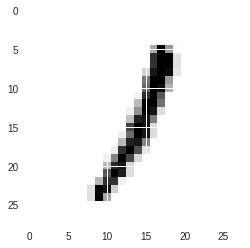

1


In [7]:
from chainer import datasets
import matplotlib.pyplot as plt
%matplotlib inline


train, test = datasets.get_mnist()
x, y = train[99]

plt.imshow(x.reshape(28,28),cmap='gray_r')
plt.show()
print(y)

# モデルの定義

それでは次に学習対象のモデルを定義します。

今回は3層からなるニューラルネットワークの例をあげます。

```
import chainer
from chainer import links as L
from chainer import functions as F

...

class MLP(chainer.Chain):

    def __init__(self, n_units, n_out):
        super(MLP, self).__init__()
        with self.init_scope():
            # the size of the inputs to each layer will be inferred
            self.l1 = L.Linear(None, n_units)  # n_in -> n_units
            self.l2 = L.Linear(None, n_units)  # n_units -> n_units
            self.l3 = L.Linear(None, n_out)    # n_units -> n_out

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)
```

ニューラルネットワークのモデルを定義するオブジェクトは `chainer.Chain`（以降 `Chain` ）を継承します。
`Chain` を継承することで，このモデルを保存したり読み込んだりすることができます。

モデルでは`with self.init_scope()`のスコープ内で利用するパラメータ付き関数であるLinkを登録します。

上記の例では `Linear` である `l1`, `l2`, `l3` を登録しています。
`Linear` は線形変換であり，初期化引数として入力次元数と出力次元数をうけとります。
`Linear` の入力次元数に `None` を指定した時は，それが最初に呼び出された時，次元数を引数から推定してくれます。

初期化時に登録されたLinkはあとで `self.l1` のようにオブジェクトの属性として参照できます。

次に，モデルを使って入力をどのように変換して出力を得るのかを定義します。
学習時に出力から入力へ逆方向に勾配を伝播させる誤差逆伝搬法との比較で，この入力から出力への計算を順計算（forward-computation）とよびます。

順計算は，多くの場合 `__call__` メソッドで定義します。
さきほど登録した `l1`, `l2`, `l3` を使って入力 `x` から3回線形変換と2回ReLUを適用して結果を返す順計算を定義してみましょう。

```
    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)
```

最後， `self.l3(h2)` には `F.relu` を適用していないことに注意してください。
softmaxを使う際によくある間違いとして，最後の出力にもReLUを適用してしまうというのがあります。
softmaxの定義域は負を含む実数ですので，その入力を非負に制約すると，想定しない制約を課して学習することになります。

順計算は `__call__` で定義する必要は必ずしもありません。
また，順計算は複数用意してもよいですし，その場で新しく作ってもよいです。
例えば，2層目の途中の中間結果を返すメソッドを次のように定義し使うこともできます。

```
    def forward_with_two_layers(self, x):
        h1 = F.relu(self.l1(x))
        return self.l2(h1)
```

順計算を `__call__` で定義したおかげで，この `MLP` は， `()` で順計算を呼び出すことができます。

このように作ったMLPを分類器として使うには `L.Classifier` を使ってモデルを作ります。
`Classifier` はデフォルトでは分類器softmax，学習時の損失関数はsoftmaxクロスエントロピー損失を使います。
`Classifier` が引数としてとるモデルは `__call__()` で順計算が定義されていることを想定しています。

```
model = L.Classifier(MLP(784, 10))
```

## メモ: Define-by-Run

Chainerの特徴は"Define-by-Run"，つまり順に実行しながらネットワークを定義していきます。
この例では関数呼び出し `__call__` の中でネットワークを順に作っています。

## 課題

`Chain` を継承したオブジェクトに登録されているパラメータ付関数は `namedlinks()` で呼び出すことができます。
例えば上の例の場合 `l1`, `l2`, `l3` が呼び出されます。
上の例を4層のニューラルネットワークに変更し`namedlinks()`の要素を表示してください。

In [9]:
import chainer
from chainer import functions as F
from chainer import links as L

# make your network


class MLP(chainer.Chain):
    def __init__(self, n_units, n_out):
        super(MLP, self).__init__()
        with self.init_scope():
            # the size of the inputs to each layer will be inferred
            self.l1 = L.Linear(None, n_units)  # n_in -> n_units
            self.l2 = L.Linear(None, n_units)  # n_units -> n_units
            self.l3 = L.Linear(None, n_out)    # n_units -> n_out

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)


model = L.Classifier(MLP(784, 2))

# print out namedlinks
for l in model.namedlinks():
    print(l)

('/', <chainer.links.model.classifier.Classifier object at 0x7f7defad2710>)
('/predictor', <__main__.MLP object at 0x7f7defad2780>)
('/predictor/l2', <chainer.links.connection.linear.Linear object at 0x7f7defad27f0>)
('/predictor/l3', <chainer.links.connection.linear.Linear object at 0x7f7defad2a58>)
('/predictor/l1', <chainer.links.connection.linear.Linear object at 0x7f7defad27b8>)


# MNISTの学習

これまで，学習/評価用データセットを作り，また学習対象のモデルを作りました。

```
train_full, test_full = chainer.datasets.get_mnist()
train = datasets.SubDataset(train_full, 0, 1000)
test = datasets.SubDataset(test_full, 0, 1000)
model = L.Classifier(MLP(100, 10))
```

それでは実際に学習させてみましょう。
今回は時間短縮のためMNISTデータセットのうち1000件のみを用いることにします。

Chainerでは学習操作を抽象化するための機能が揃っています。
これらを利用することで殆ど自分でコードを書くことなく学習させることができます。

はじめにデータセット上の操作を抽象化する `Iterator` を用意します。
`Iterator` は構築時にデータセットを引数として指定すると，そのデータセットに対する `Iterator` を返します。
引数として，`batch_size` は，一度のアクセスでいくつ同時に読み込むか， `shuffle` はアクセスの際にランダムにアクセスするかどうかを指定します。

```
# Set up a iterator
batchsize = 100
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize,
                                             repeat=False, shuffle=False)
```

次に，パラメータの最適化を担当する `Optimizer` を用意しします。
ここでは複数ある `Optimizer` の中で `Adam` を使います。
`Adam` は広い学習問題で安定して学習できる手法です。

`Optimizer` はsetup()で最適化対象の `Chain` または `Link` を指定する必要があります。

```                                
# Set up an optimizer
opt = chainer.optimizers.Adam()
opt.setup(model)
```

次に，実際のパラメータ更新を担当する `Updater` を用意します。
これまで用意した学習用データに対するIterator，最適化を担当する `Optimizer` ，そしてどのデバイスで
実行するのかを指定します。`device=-1`はCPUを使うことを表します。

```
# Set up an updater
updater = training.StandardUpdater(train_iter, opt, device=-1)
```

最後に学習ループを担当する `Trainer` を用意します。
今回は5エポック(5回データセットを走査する)だけ学習を回すようにします。

```
# Set up a trainer
epoch = 5
trainer = training.Trainer(updater, (epoch, 'epoch'), out='/tmp/result')
```

`Trainer` は様々な拡張機能を使うことができます。

評価データで評価をするには，次のようにします。

```
trainer.extend(extensions.Evaluator(test_iter, model, device=-1))
```

学習途中の結果を表示するには，次のようにします。
1エポックごとに、trainデータに対するaccuracyと、testデータに対するaccuracyを出力させます。

```
trainer.extend(extensions.LogReport(trigger=(1, "epoch")))
trainer.extend(extensions.PrintReport(
        ['epoch', 
         'main/accuracy', 'validation/main/accuracy']), trigger=(1, "epoch"))
```

これで全て用意ができました。
trainerのrunを呼び出すことで学習できます。

```
# Run the trainer
trainer.run()
```

最後に学習の結果を確認してみましょう。
ランダムに選んだテストデータ一件に対する予測を出力します。

```
x, y = test[np.random.randint(len(test))]
playground.print_mnist(x)
pred = F.softmax(model.predictor(x.reshape(1, 784))).data
print("Prediction: ", np.argmax(pred))
print("Correct answer: ", y)
```


## 課題

`Trainer` を実際に動かし学習できることを確かめてください。
その上で例えばユニット数を変えたり，epoch（学習回数）を変えたり， `Optimizer` を `RMSprop()` などに変えたりして精度が変わることを確認してください。

In [10]:
import chainer
from chainer import datasets
from chainer import functions as F
from chainer import links as L
from chainer import optimizers
from chainer import training
from chainer.training import extensions
import numpy as np


class MLP(chainer.Chain):

    def __init__(self, n_units, n_out):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units)  # n_in -> n_units
            self.l2 = L.Linear(None, n_units)  # n_units -> n_units
            self.l3 = L.Linear(None, n_out)    # n_units -> n_out

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)


# create model
model = L.Classifier(MLP(100, 10))

# load dataset
train_full, test_full = datasets.get_mnist()
train = datasets.SubDataset(train_full, 0, 1000)
test = datasets.SubDataset(test_full, 0, 1000)

# Set up a iterator
batchsize = 100
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize,
                                             repeat=False, shuffle=False)

# Set up an optimizer

# Set up an updater

# Set up a trainer

# Run the trainer

# Check the result

# Chainerの基本：機械学習

ニューラルネットワークを含んだ多くの機械学習における学習タスクは最適なパラメータを探す問題です。

そして，最適なパラメータは目的関数の最小化（最大化）問題を解くことで自動的に得られます。

一般に何かを学習させたいという場合は次のステップからなります。

1) 学習対象のモデルを定義する

Chainerの場合，Function, Link, Chainを組み合わせて入力から出力を求める関数を定義することに対応します。

2) 目的関数 $L(F(\theta))$ を定義する

Chainerの場合，Classifierや損失関数（例：F.soft_cross_entropyや，F.mean_squared_error）を使うことに対応します。

3) 目的関数を最小化するような$\theta$を最適化問題を解くことで得る

Chainerの場合，Optimizerを使って学習させることに対応します。

これらを順に紹介していきます。

# Chainerの基本：Variable

それではこの章からChainerの基本についてみていきます。

ChainerはDefine-by-runとよばれる思想に基づいて作られています。
これは計算手順を書くとそれ自体がネットワークの定義になるというものです。

## メモ

ネットワークの定義に利用する変数はVariableとよばれるオブジェクトとして定義する必要があります。
Variableオブジェクトとして定義すると，以降このVariableオブジェクトを含む計算手順は全て追跡され計算グラフが自動的に作られます。

例として，5という値一つからなるndarrayを作り，それを元にVariableを作ってみましょう。

```
x_data = np.array([5], dtype=np.float32)
x = Variable(x_data)
```

このVariableオブジェクトは普通の数と同じように基本的な算術演算をすることができます。
例えば，次のように実行できます。

```
y = x ** 2 - 2 * x + 1
```

Variableオブジェクトを使った演算結果はVariableオブジェクトとなります。
この例の場合，yもVariableオブジェクトです。

Variableオブジェクトの値はdata属性で参照することができます。

```
y.data
```

また，numpyと同じ添字アクセスを備えています。

```
z_data = np.array([[2, 3, 4], [5, 6, 7]], dtype=np.float32)
z = Variable(z_data)
print(z[:, 1].data) # [3, 6]
```

# 課題

i=0...100について，Variableオブジェクトを$x_i=2*i+1$とした上で，これらの二乗和であるVariableオブジェクト$y=\sum_i x_i^2$を計算しその値を表示せよ

In [11]:
from chainer import Variable
import numpy as np


x_data = np.array([5], dtype=np.float32)
x = Variable(x_data)
y = x ** 2 - 2 * x + 1
print(y.data)

z_data = np.array([[2, 3, 4], [5, 6, 7]], dtype=np.float32)
z = Variable(z_data)
print(z[:, 1].data)  # [[3], [6]]

[16.]
[3. 6.]


# Chainerの基本：backward 後ろ向き計算

Variableオブジェクトは値だけではなく，それまでの計算履歴を全て持っています。
この計算履歴にはどの変数と変数をどのような演算で組み合わせたかという情報を全て持っています。
このような計算履歴は計算グラフとも呼ばれます。

## メモ

この計算履歴はdump_graphを使って図示化することができます。使い方は[mnist example](https://github.com/pfnet/chainer/blob/master/examples/mnist/train_mnist.py)を参照してください。

この計算履歴の情報を使って，最終的な値（スカラー値）に対する各変数についての勾配（gradient, grad）を計算することができます。
Chainerではこの勾配を後ろ向き計算（逆誤差伝播法）を使って効率的に求めることができます。

さきほどの演算結果であるVaribleオブジェクトyのbackward関数を呼び出すと勾配を計算し，yの計算結果に関連したVaribleのgrad属性に勾配をセットします。

```
y.backward()
print(x.grad)
```

値yの変数xについての勾配というのは，簡単に言えば$x$をほんの少しだけふやした時に，$y$がどの程度変わるのかという値です。

例えば，$y=2x$というのは，$x$をほんの少し$d$だけ増やした時，$y$は$2d$だけ増えます。
そのため$y=2x$という値の$x$についての勾配は（$x$によらず）2となります。

$x$がベクトルやテンソルの場合には，各要素について，他の要素を固定した上で，対象の要素だけを少しだけ動かした時にどの程度変わるのかという値になります。これは数学的には偏微分とよびます。

変数$x$がベクトルやテンソルの場合は勾配はその要素毎の偏微分を並べたベクトルやテンソルになります。
このため勾配ベクトルとよんだりもします。

また，勾配ベクトルは今の各変数をどの方向に動かしたら最も急激に関数が大きくなるのかという値を意味しています。
その逆に，勾配ベクトルの逆向きは最も急激に関数の値を小さくなる方向です。

backwardは基本的には損失関数の値などスカラー値に対して呼び出せます。
複数の値に対する偏微分を並べたものはヤコビアン行列とよびますがChainerではヤコビアン行列の計算はサポートしていません。
スカラー値でない場合，ユーザーが手動でgradを設定をすればbackwardを呼び出して計算することができます。

```
z = Variable(np.array([10, 20], dtype=np.float32))
zz = 2 * z

# これはエラー，backwardはスカラー値に対してしか基本的には呼び出せない
zz.backward()

# ユーザーがzzの勾配を設定すればbackwardを呼び出せる．これは何らかの値に対する勾配とみなせる
zz.grad = np.array([0.1, -0.1], dtype=np.float32)
zz.backward()
```

## 課題

右の例で，実際に求めた勾配を0.01倍したものを$x$に足した上で$y$の値が実際に大きくなっていることを確かめよ。 

In [12]:
from chainer import Variable
import numpy as np

x_data = np.array([5], dtype=np.float32)
x = Variable(x_data)
y = x ** 2 - 2 * x + 1
y.backward()

z = Variable(np.array([10, 20], dtype=np.float32))
zz = 2 * z
zz.grad = np.array([0.1, -0.1], dtype=np.float32)
zz.backward()

print(x.grad)
print(z.grad)

# print(y.data)

[8.]
[ 0.2 -0.2]


# Chainerの基本：Function, Link, Chain

Chainer上のニューラルネットワークの定義で使う関数を表すオブジェクトには次の三つの種類があります。

* Function
　学習可能なパラメータを持たない関数

* Link
　学習可能なパラメータを持った関数

* Chain（Linkを継承）
　複数のLinkから構成される関数
　Chain自体はLinkを継承しているので他のChainを組み合わせて構成することも可能

ニューラルネットワークの定義ではこれらを組み合わせていくことで実現されます。

それではこれらを順に紹介していきましょう。

# Chainerの基本：Function

Functionオブジェクトは学習可能なパラメータを持たない関数です。
但し通常の関数とは違って逆誤差伝播が計算できるように，前向き計算に加えて，後ろ向き計算ができるようになっています。

また，CPUとGPUの両方における計算が定義されています。
内部では，foward_cpu, foward_gpu, backward_cpu, backward_gpuの四種類の実装がされています。

Functionを利用するには，Functionのインスタンスを作成後に関数として呼びだします。
ニューラルネットワークで利用する多くの関数がchainer.functionsで既に実装されています。
例えば，$\mathrm{relu}(x) = \max(x, 0)$で定義されるrelu関数は次のように呼び出します。

```
from chainer import functions as F

x_data = np.array([5], dtype=np.float32)
x = Variable(x_data)
y = F.relu(x)
```

これらの関数の多くは要素毎に対する関数適用であり，計算結果のshapeは計算元と変わりませんが，
一部の関数はshapeが変わります。


なお，Variableは基本的な算術演算ができるという話しでしたが、それらは実際には算術演算を対応するFunction呼び出しをオーバーロードして実現されています。

例えば，

```
x = Variable(x_data)
y = Variable(y_data)
z = x + y
```

は，内部ではそのFunctionオブジェクト

```
z = F.Add(x, y)
```

を呼び出しています。

Functionは計算履歴を追跡する仕掛けが含まれています。
Functionを適用した結果はVariableであり，backwardを呼び出して勾配を求めることができます

```
z.backward()
```

Variableが保持するデータはndarrayなので，numpyと同様の様々な配列変換（例えばreshapeやtransposeなど）を使いますがこの場合も計算結果が追跡できるようにfunctionsにある対応する関数を呼び出す必要があります。

```
z = Variable(np.array([[10, 20], [30, 40]], dtype=np.float32))
zz = F.transpose(z)
print(zz.data)
```


## メモ

後ろ向き計算とは、 逆誤差伝播法で使われる出力に対する入力についての勾配，つまり$y = f(x)$の時 $\partial y / \partial x$の計算です。例えば$y=3x^2$の場合は後ろ向き計算は$y$の$x$についての微分，つまり$6x$が後ろ向きの結果になります。
後ろ向き計算は効率的に計算でき，多くの場合前向き計算とほぼ同じ計算量で求めることができます。

## 課題

$x=[3, 4, 5]$の時，$\exp(x)+\sin(x)$の勾配を求めて表示せよ。

In [13]:
from chainer import functions as F
from chainer import Variable
import numpy as np


x_data = np.array([5], dtype=np.float32)
x = Variable(x_data)
y = F.relu(x)

z = Variable(np.array([[10, 20], [30, 40]], dtype=np.float32))
zz = F.transpose(z)
print(zz.data)

# print() exp(x)+sin(x)

[[10. 30.]
 [20. 40.]]


# Chainerの基本：Link

ニューラルネットワークはパラメータを持った関数のパラメータを調整することで学習を実現します。

Chainerではこのような学習可能なパラメータを持った関数をLinkとよびます。

```
from chainer import links as L
```

例として，ニューラルネットワークで最も広く利用される関数である[Linear](http://docs.chainer.org/en/stable/reference/links.html)を紹介しましょう。
このLinearは総結合層，またはアフィン変換とよばれ，次の関数で表現されます。

```math
f(x; W, b) = Wx + b
```

関数において，$;$より後ろ側の変数はそれがパラメータだということを意味します。
Linearは初期化パラメータとして（入力の次元数, 出力の次元数）をうけとります　　
例えば入力が3次元のベクトルで出力が2次元のベクトルの場合，

```
f = L.Linear(3, 2)
```

のように定義されます。
これは内部では3行2列の行列Wと2列のベクトルbからなります。

Linkのパラメータは属性に保存されており，それらはVariableです。
例えば，Linkの場合，Wとbの属性があります。

```
f.W
f.b
```

Chainerの場合，Wのデフォルト値はガウシアン分布に従う乱数で初期化され，bは0に初期化されます。
これらの初期値はオプション引数で選ぶことができます。
また，デフォルトではバイアス項であるbがありますが，nobias=Trueを指定することでバイアスが無いLinearを作ることができます。

LinkはFunctionと同様に関数として呼び出すことができます。

多くのFunctionやLinkは入力として最初の次元数がバッチであるようなミニバッチ入力をうけとるように設計されています。
例えば，先程のLinearはバッチサイズがNの時，shapeが(N, 3)であるVariableを入力とし，shapeが(N, 2)でVariableを出力します。

```
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], dtype=np.float32)
y = f(x)
print(y.data)
```

Linksでは次のようなメソッドがあります（全て覚える必要はありません）。

* add_persistent(name, value)
　save, load時の対象となるパラメータを追加する。
* addgrads(link)
　linkのgradient値を加算する。例えば分散学習時に使われる。
* children()
　子のlinkのgeneratorを返す。
* cleargrads()
　gradの値を0に初期化する。backward命令の前に呼び出す必要がある。
* copy()
　対象のlinkの子全てをコピーする。浅いコピーであり，パラメータのVariableはオブジェクトはコピーだが，それらのdataとgradient配列は共有される。linkの名前は初期化される。
* copyparams(link)
　linkからparameterをコピーする。
* namedlinks()
　全てのpath, linkを返す
* namedparams()
　全てのpath, paramを返す
* serialize(serializer)
　このlinkオブジェクトをserializeする
* to_cpu()
　パラメータとpersistent値をCPUにコピーする
* to_gpu(device=None)
　パラメータとpersistnt値をGPUにコピーする
* xp
　今CPUとGPUのどちらにいるかにしたがって，CPUであればnumpy，GPUであればcupyを返す

## メモ

殆どのLinkには，それと同じ名前のFunctionが存在します。
例えばLinearもlinks.Linearとfunctions.Linearが存在します。
前者が学習可能パラメータを属性として持ったLinkであり，後者は学習可能パラメータを引数として受け取って計算Functionです。
links.Linearは内部でfunctions.Linearを呼び出して使っています。
もしユーザーが自分で学習対象パラメータを管理した上で同じ関数を使いたい場合はfunctions上で定義されている関数を直接呼び出して使うことができます。

## 課題

入力，出力がともに(N, 3, 4)であるような[bias](http://docs.chainer.org/en/stable/reference/links.html?highlight=link#bias)を作り，それをshapeが(2, 3, 4)であるVariableに適用し，その結果を表示せよ。

In [14]:
from chainer import links as L
import numpy as np


f = L.Linear(3, 2)
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]],
             dtype=np.float32)
y = f(x)
print(y.data)

[[-1.6726933   0.95064974]
 [-3.5202675   1.4190176 ]
 [-5.3678417   1.8873852 ]
 [-7.2154164   2.355753  ]]


# Chainerの基本：Chain

多くのニューラルネットワークは複数のLinkから構成されます。
例えば，多層パーセプトロンは複数のLinear層からなります。

Chainerでは複数のLinkをまとめて一つのオブジェクトChainとして扱うことができます。
Chainはユーザーがネットワークを定義する際に利用されます。

```
class MyChain(Chain):
    def __init__(self):
        super(MyChain, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(4, 3)
            self.l2 = L.Linear(3, 2)

    def __call__(self, x):
        h = self.l1(x)
        return self.l2(h)
```

Chainを継承すると，その中に含まれる複数のLinkの管理やCPU/GPU間のデータ移動などが実現されます。

ChainではLinkを登録するには，例のように`with self.init_scope()`の中で登録します。

Chainの中に含まれるLinkを子Linkとよびます。
例えばさきほどの例ではl1とl2がMyChainの子Linkです。
なお，Chain自身もLinkを継承しています。
そのため，あるChainを他のChainの子リンクとして使うことができます。

Chainの子リンクは属性としてアクセスすることができます。

```
c = MyChain()
print(c.l1.W.data)
```

また，Chainでは各Linkを名前付きで定義していましたが，任意個のLinkのリストを受け取るChainListを使うこともできます。

```
class MyChainList(ChainList):
    def __init__(self):
        super(MyChain, self).__init__(
            L.Linear(4, 3),
            L.Linear(3, 2),
        )

    def __call__(self, x):
        h = self[0](x)
        return self[1](h)
```

# 課題

正の整数$n$を初期化パラメータとして受け取り，$n$個のLinear(3, 3)を子Link(l1, l2, ..., ln)として含み，入力に対し$l1, l2, ..., ln$を順に適用するようなChainオブジェクトを作れ。

In [15]:
from chainer import Chain
from chainer import ChainList
from chainer import links as L


class MyChain(Chain):
    def __init__(self):
        super(MyChain, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(4, 3)
            self.l2 = L.Linear(3, 2)

    def __call__(self, x):
        h = self.l1(x)
        return self.l2(h)


class MyChainList(ChainList):
    def __init__(self):
        super(MyChainList, self).__init__(
            L.Linear(4, 3),
            L.Linear(3, 2),
        )

    def __call__(self, x):
        h = self[0](x)
        return self[1](h)


c = MyChain()
c2 = MyChainList()

# Chainerの基本：Optimization

次に学習のエンジンである最適化を紹介します。

最適化は，与えられた目的関数$F(x)$の最小値または極小値およびそれを達成する変数xを探す問題です。

機械学習は最適化を使ってパラメータを推定，つまり学習を実現します。
この実現のために，作ったモデルの推定結果$y'=F(x; \theta)$と望ましい結果$y'$の差を測る損失関数$l(y', y)$を用意します。
損失関数は推定した結果が望ましい結果であれば0，そうでなければ大きな正の値をとるような関数です。
例えば回帰問題などでは二乗誤差$l(y', y) = (y' - y)^2$を使い，分類問題ではクロスエントロピー誤差 $-p(y) \log{p(y')}$を使います。

学習データセット${(x_i, y_i)}$が与えられた時，この学習データセットに対して損失関数の和が最小になるようなパラメータを探せば，それは多くの学習データを望ましい結果で推定していることになります。

```math
L(\theta) = \sum_i l(F(x_i; \theta), y_i)
```

また，学習データに依存しないような事前知識を正則化項$R(\theta)$として入れることもできます。

```math
L(\theta) = R(\theta) + \sum_i l(F(x_i; \theta), y_i)
```


これらの目的関数を最小化すれば，多くの学習データをうまく推定でき，事前知識の制約も満たすようなパラメータを求めることができます。

## Memo

最小値，極小値

全ての $x$ について $F(x) >= F(x^*)$ を満たすような $F(x^*)$ を最小値とよび，それを達成する $x^*$ を最小解とよびます。
一方 $x$ の近傍を $R(x)$ とした時，$x \in R(x^*) $ について $F(x)>=F(x^*a)$ を満たすような $F(x^*)$ を極小値とよび，それを達成する $x^*$ を極小解とよびます。
目的関数が凸関数のような性質をもっていない場合，最小解を見つけることは一般に難しく極小解を見つけることになります。
一方でニューラルネットワークの学習における最適化の場合，殆どの極小解は最小解と殆ど変わらないほど性能が良いことが予想されています[link](https://arxiv.org/abs/1412.0233)。


Chainerでは様々な最適化Optimizerがchainer.optimizersで実装されています。
Optimizerを使うにはoptimizerを初期化し，次にoptimizerの最適化対象となるlinkをsetup()で設定します。

```
from chainer import optimizers

model = F.Classifier(MyLink())
optimizer = optimizers.Adam()
optimizer.use_cleargrads()
optimizer.setup(model)
```

この場合，modelというlinkが最適化対象になります。


初期化の際，いくつかパラメータを選べます。
これらのパラメータはハイパーパラメータとよばれ，上記の最適化に使うものですから，自動決定できないパラメータです。
そのためハイパーパラメーターはユーザーが指定するか，決められた候補の中を全部試すか，別の推定手法を使う必要があります。

Chainerが用意しているoptimizerの中で代表的なものは次の三つです。

* SGD
* Adam
* RMSProp

どれを使えばよいかはそれぞれ異なる最適化手法に基づいているので一概にいえませんが，安定して最適化できるのでAdam，ハイパーパラメータを選ぶが安定して精度が出やすいのはRMSPropという特徴があります。SGDは最も単純な更新則にもとづいており上記の二つの手法に比べると性能は悪くデバッグ目的以外では使う必要はありません。

optimizerの使い方は三つあります。後の方がより使いやすくカスタマイズしにくい方法になります。

* ユーザーがbackward()などで勾配を求めて，引数なしのupdate()を呼び出します。この場合，cleargrads()を最初に呼ぶ必要があります。

```
model.cleargrads()
loss.backward()
optimizer.update()
```

* 損失関数をupdate()に渡す。この場合，cleargrads()はupdate内で自動的によばれます。そのためcleargradsのよび忘れがなく簡潔に書けます。

```
def lossfun(args...):
    ...
    return loss
optimizer.update(lossfun, args...)
```

* Trainerを利用する

これについては後の章で紹介します。

後の方法になるほど，より簡潔に書くことができます。
一方で細かく最適化を制御したい（例えば，直接gradを操作したい）場合は最初の方法を使うことができます。

## 課題

SGD最適化は関数$F(x; s)$のパラメータsについての勾配が$v$の時

```math
s := s - a v
```

とすることで最適化を行います，但しa>0は学習律とよばれるハイパーパラメータです。

```
def f(x):
    return 5.*x + 10

x = np.linspace(-10, 10, num=1001)
y = f(x) + 5.*np.random.randn()
```

で与えられるデータセット$(x, y)$について最小二乗誤差（F.mean_squared_error）を損失関数として使ってSGDで

```math
y = ax + b
```

の$a, b$（この場合$a=5.0, b=10$に近い値，但し乱数による誤差で必ずしも5.0, 10.0とはならない)を推定するプログラムを書け。

In [16]:
from chainer import Chain
from chainer import functions as F
from chainer import links as L
from chainer import optimizers
from chainer import Variable
import numpy as np


class Linear(Chain):
    def __init__(self):
        super(Linear, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(1, 1)

    def __call__(self, x):
        return self.l1(x)


def f(x):
    return 5. * x + 10


x = np.linspace(-10, 10, num=1001)
y = f(x) + 5. * np.random.randn(1001)

model = Linear()

opt = optimizers.SGD()
opt.setup(model)
for epoch in range(100):
    perm = np.random.permutation(len(x))
    for i in range(len(x)):
        x_i = Variable(np.array([[x[perm[i]]]], 'f'))
        y_i = Variable(np.array([[y[perm[i]]]], 'f'))
        # Write Here

# Chainerの基本：Dataset

Chainerでは処理対象となるデータセットを抽象化したDatasetとよばれるオブジェクトを扱います。

Datasetはデータセットに対するイテレーター，つまりデータ上を走査する機能，およびデータに対する前処理を備えます。

Datasetは添字によるアクセス，および範囲指定を備えており配列と同じように扱うことができます。

Iteratorは次の属性を持ちます

* batchsize
* epoch　データ上何回目の走査か
* epoch_detail データ上何回目の走査かの浮動小数点表現，例えば，2週目とデータ半分をみている場合，2.5となる
* is_new_epoch 直前のupdateの終了時にepochが1つ上がったかどうか

## TupleDataset

複数のデータセットを一つのデータセットにまとめ，各サンプルはi番目の要素がi番目のデータセットに対応するようなTupleで表現される。

例えば，入力からなるデータセット$X$と，出力からなるデータセット$Y$を組み合わせて作られた$TupleDataset([X, Y])$は，$i$番目の要素は$(X[i], Y[i])$を返す。教師あり学習の場合によく使われる。

## DictDataset

複数のデータセットを名前付きで一つのデータセットにまとめ，各サンプルは名前付きの辞書で表現される。

# Chainerの基本：Serializer

最後に紹介する機能がシリアライザです．
Link, Optimizer, Trainerがシリアライザをサポートしています。

```
serializers.save_npz('my.model', model)
```

これは，modelを'my.model'にNPZ（numpy + zip）形式で保存します。

保存されたモデルはload_npzで読み込むことができます。

```
serializers.load_npz('my.model', model)
```

同様に，HDF5フォーマットで保存するためのsave_hdf5, load_hdf5が存在します。

なお，シリアライズされるのは，parametersとpersistent valuesのみでそれ以外の属性値はシリアライズされないことに注意してください。シリアライズの対象にするには，add_persistent()を利用してください。

# Chainerの基本：MNIST 例

次にネットワークアーキテクチャを定義します。

次の例は，3層からなるニューラルネットワークであり，中間層のユニット数がn_unitsであり，出力層のunit数からなります。

この際，Linearの入力サイズがNoneとなっていますがこれは最初の実行時に入力から推論されます。

```
class MLP(chainer.Chain):

    def __init__(self, n_units, n_out):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units)  # n_in -> n_units
            self.l2 = L.Linear(None, n_units)  # n_units -> n_units
            self.l3 = L.Linear(None, n_out)    # n_units -> n_out

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)
```

次に，損失関数を定義するClassifierを定義します。
Classiferは精度を計算した上で損失をsoftmax_cross_entropyを使って定義します。

```
class Classifier(Chain):
    def __init__(self, predictor):
        super(Classifier, self).__init__()
        with self.init_scope():
            self.predictor = predictor

    def __call__(self, x, t):
        y = self.predictor(x)
        loss = F.softmax_cross_entropy(y, t)
        accuracy = F.accuracy(y, t)
        report({'loss': loss, 'accuracy': accuracy}, self)
        return loss
```

これとほぼ同じ機能が既にchainer.links.Classifierで実装されています。

```
model = L.Classifier(MLP(784, 100, 10))
opt = optimizers.Adam()
opt.setup(model)
```

なお，L.Classiferは初期化時に次の三つの関数を受け取れるようになっています

* predictor
　学習対象であるLink
* lossfun
　誤差関数に使う関数。上記例の場合はF.softmax_cross_entropy
* accfun
　精度評価につかう関数。上記の場合はF.accuracy

## 課題

右のコードで各ミニバッチに対し，MLPで予測した結果のaccuracyを表示しなさい．

In [17]:
import chainer
from chainer import functions as F
from chainer import links as L
from chainer import Variable
import numpy as np


class MLP(chainer.Chain):

    def __init__(self, n_units, n_out):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units)  # n_in -> n_units
            self.l2 = L.Linear(None, n_units)  # n_units -> n_units
            self.l3 = L.Linear(None, n_out)    # n_units -> n_out

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)


batchsize = 100
train, test = chainer.datasets.get_mnist()
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(
    test, batchsize, repeat=False, shuffle=False)

model = MLP(784, 10)
opt = chainer.optimizers.Adam()
opt.setup(model)

train_num = len(train)
for i in range(0, train_num, batchsize):
    batch = train_iter.next()
    x = Variable(np.asarray([s[0] for s in batch]))
    t = Variable(np.asarray([s[1] for s in batch]))

# Chainerの基本：MNIST 例

ようやく学習ができるようになりました。

modelによる入力xに対する予測結果をyとします。
そして，yとtとの間で測ったクロスエントロピー損失をlossとします。
そして，optを更新します。

この学習自体は何回も学習データを回す必要があるのでepoch_num回ループするようにします。
```
epoch_num = 5
for epoch in range(epoch_num):
    train_loss_sum = 0
    train_accuracy_sum = 0
    for i in range(0, train_num, batchsize):
        batch = train_iter.next()
        x = np.asarray([s[0] for s in batch])
        t = np.asarray([s[1] for s in batch])
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        model.cleargrads()
        loss.backward()
        opt.update()
        train_loss_sum += loss.data
        train_accuracy_sum += F.accuracy(y, t).data
```

次に評価用データセットで性能を評価するコードです。
この部分は学習と殆ど同じで唯一の違いはbackwardを呼ばず，modelの更新をしない部分です。
```
...
test_loss_sum = 0
test_accuracy_sum = 0
for i in range(0, test_num, args.batchsize):
    batch = train_iter.next()
    x = xp.asarray([s[0] for s in batch])
    t = xp.asarray([s[1] for s in batch])
    y = model(x)
    loss = F.softmax_cross_entropy(y, t)
    test_loss_sum += loss.data.get()
    test_accuracy_sum += F.accuracy(y, t).data.get()
...
```

## 課題

実際に実行し，精度がどのように代わっていくのかを調べよ。

In [18]:
import chainer
from chainer import functions as F
from chainer import links as L
import numpy as np


class MLP(chainer.Chain):

    def __init__(self, n_units, n_out):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units)  # n_in -> n_units
            self.l2 = L.Linear(None, n_units)  # n_units -> n_units
            self.l3 = L.Linear(None, n_out)    # n_units -> n_out

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)


batchsize = 100
train, test = chainer.datasets.get_mnist()
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(
    test, batchsize, repeat=True, shuffle=False)

model = MLP(784, 10)
opt = chainer.optimizers.Adam()
opt.setup(model)

train_num = len(train)
test_num = len(test)

epoch_num = 10
for epoch in range(epoch_num):
    train_loss_sum = 0
    train_accuracy_sum = 0
    for i in range(0, train_num, batchsize):
        batch = train_iter.next()
        x = np.asarray([s[0] for s in batch])
        t = np.asarray([s[1] for s in batch])
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        model.cleargrads()
        loss.backward()
        opt.update()
        train_loss_sum += loss.data
        train_accuracy_sum += F.accuracy(y, t).data
    print(train_loss_sum, train_accuracy_sum)

    test_loss_sum = 0
    test_accuracy_sum = 0
    for i in range(0, test_num, batchsize):
        batch = test_iter.next()
        x = np.asarray([s[0] for s in batch])
        t = np.asarray([s[1] for s in batch])
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        test_loss_sum += loss.data
        test_accuracy_sum += F.accuracy(y, t).data

    print("%5d %.5f %.5f %.5f %.5f" %
          (epoch,
           train_loss_sum / train_num,
           train_accuracy_sum / train_num * 100,
           test_loss_sum / test_num,
           test_accuracy_sum / test_num * 100))

118.48294753395021 564.1600015684962
    0 0.00197 0.94027 0.00096 0.97130
45.635082385502756 585.7700055837631
    1 0.00076 0.97628 0.00077 0.97670
29.011558642145246 590.830006301403
    2 0.00048 0.98472 0.00082 0.97610
21.089173171902075 593.2300056219101
    3 0.00035 0.98872 0.00065 0.98100
17.14438199502183 594.2400047779083
    4 0.00029 0.99040 0.00077 0.98040
14.255777348545962 595.2500039339066
    5 0.00024 0.99208 0.00067 0.98210
13.013227524599642 595.9900035858154
    6 0.00022 0.99332 0.00073 0.98040
10.054194167620153 596.5800032019615
    7 0.00017 0.99430 0.00090 0.98050
11.207220488930034 596.7100029587746
    8 0.00019 0.99452 0.00083 0.98060
7.395797035227588 597.5300023555756
    9 0.00012 0.99588 0.00086 0.98240


# Chainerの基本：MNIST 例

実はこれまで紹介してきた多くの処理は実はUpdater, Trainerとよばれる仕組みを使えば
ユーザーが書く必要はありません。

これまでは，内部でどのような処理をしているのかを知ってもらうためにあえて説明をしました。

それではUpdater, Trainerの機能を使って学習部分を書き直していきましょう。

まず，updateを担当するUpdaterを用意します

```
updater = training.StandardUpdater(train_iter, optimizer)
```

updaterには既に作成したiteratorとoptimizerを渡します。
次に訓練を実行するTrainerをupdaterを渡して作ります。

```
trainer = training.Trainer(updater, (20, 'epoch'), out='result')
```

二つ目の引数は訓練回数を示す引数であり，単位として'epoch'か'iteration'を受けとります。

例えば，(20, 'epoch')はデータ全体を20回走査するという意味ですし，('1000', 'iteration'）はミニバッチを1000回動かすという意味です。

準備ができました。後はrun()をよびだし実行するだけです。

```
trainer.run()
```

先程はepochの回数だけループを回し，その中でbackwardを呼び出したりといろいろな手間がかかっていましたが
今回はUpdater, Trainerを用紙するだけで実現できたことに注意してください。

さらに，学習の際に必要な機能の多くはextentionsとよばれる拡張機能により実現することができます。

例えば，次のような拡張機能がよく使われます。

* Evaluatorは学習が終わった後に，test_iterで定義されるテストデータセットで評価をしてくれます

```
trainer.extend(extensions.Evaluator(test_iter, model))
```

* LogReportは報告された値をlog fileに格納してくれます。
```
trainer.extend(extensions.LogReport())
```

* PrintReportは指定したカラムを表示してくれます。
```
trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'validation/main/accuracy']))
```

* ProgressBarは進捗度合いをプログレスバーで表示してくれます。
```
trainer.extend(extensions.ProgressBar())
```

* Snapshotは定期的にモデルのスナップショットを記録し，出力ディレクトリに格納します。
```
trainer.extend(extensions.Snapshot((10, 'epoch')))
```

## 課題

trainerを実際に動かし学習できることを確かめてください。
その上で例えばユニット数を変えたり，収束回数を変えたり，Optimizerを変えたりして精度が変わることを
確認してください。

In [19]:
import chainer
from chainer import datasets
from chainer import functions as F
from chainer import links as L
from chainer import training
from chainer.training import extensions


class MLP(chainer.Chain):

    def __init__(self, n_units, n_out):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units)  # n_in -> n_units
            self.l2 = L.Linear(None, n_units)  # n_units -> n_units
            self.l3 = L.Linear(None, n_out)    # n_units -> n_out

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)


batchsize = 10
train, test = datasets.get_mnist()
train = datasets.SubDataset(train, 0, 100)
test = datasets.SubDataset(test, 0, 100)
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize,
                                             repeat=False, shuffle=False)

model = L.Classifier(MLP(784, 10))
opt = chainer.optimizers.Adam()
opt.setup(model)

epoch = 2

# Set up a trainer
updater = training.StandardUpdater(train_iter, opt, device=-1)
trainer = training.Trainer(updater, (epoch, 'epoch'), out='/tmp/result')

# Evaluate the model with the test dataset for each epoch
trainer.extend(extensions.Evaluator(test_iter, model, device=-1))

# Dump a computational graph from 'loss' variable at the first iteration
# The "main" refers to the target link of the "main" optimizer.
# trainer.extend(extensions.dump_graph('main/loss'))

# Take a snapshot at each epoch
# trainer.extend(extensions.snapshot(), trigger=(epoch, 'epoch'))

# Write a log of evaluation statistics for each epoch
trainer.extend(extensions.LogReport())

# Print selected entries of the log to stdout
# Here "main" refers to the target link of the "main" optimizer again, and
# "validation" refers to the default name of the Evaluator extension.
# Entries other than 'epoch' are reported by the Classifier link, called by
# either the updater or the evaluator.
trainer.extend(extensions.PrintReport(
    ['epoch', 'main/loss', 'validation/main/loss',
     'main/accuracy', 'validation/main/accuracy']))

# Print a progress bar to stdout
# trainer.extend(extensions.ProgressBar())

resume = False
if resume:
    # Resume from a snapshot
    chainer.serializers.load_npz(resume, trainer)

# Run the training
trainer.run()

epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy
1           1.92843     1.43623               0.43           0.62                      
2           0.644438    0.907035              0.91           0.71                      


# 畳み込みニューラルネットワークを使った画像認識

次に畳み込みニューラルネットワークと，それを使った画像認識について説明します。

この章では与えられた画像に何がうつっているのかを認識し，
その認識結果を出力するタスクを考えます。


各画像は32*32のカラー画像で構成され，各画像には"bear"や，"telephone"など100種類の物体がうつっています。

前の章のMNISTは簡単な手書き文字認識でしたが，この章では画像はMNIST同様に小さいもの背景と前景が重なっており，同じクラスでもバリエーションが非常に大きい画像の認識を扱います。


MNISTと同様に，CIFAR-100も読み込むことができます。

```
from chainer import datasets
train, test = datasets.get_cifar100()
```

実際のサイズを確認してみましょう

```
x, y = train[0]
print x.shape
# (3, 32, 32)
```

このように画像データは，(チャンネル，縦，横）
の三次元のデータで表されます。

さらにミニバッチ学習では複数のデータをまとめて学習するため，
（データ、チャンネル，縦，横）
の４次元の配列として扱われます。

MNISTまでは，各データは1次元データ，バッチデータは次のような二次元でした。
（データ，特徴）

畳み込みニューラルネットワークではこの構造の情報を活かしてデータを変換していきます。

In [20]:

from chainer import datasets

train, test = datasets.get_cifar100()

# CIFAR-100の学習：総結合層を使った学習

はじめに，前回MNISTで使った学習器をそのまま使って学習してみましょう。

この場合，画像の構造情報は捨ててしまっています。
変更点は，MLPの入力次元数が3*32*32=3072である点のみです。

その他はそのままで実行できます。

実際実行してみると以下のような学習結果が得られます。

In [22]:
import chainer
from chainer import functions as F
from chainer import links as L
from chainer import training
from chainer.training import extensions


train, test = chainer.datasets.get_cifar10()


class MLP(chainer.Chain):

    def __init__(self, n_units, n_out):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units)  # n_in -> n_units
            self.l2 = L.Linear(None, n_units)  # n_units -> n_units
            self.l3 = L.Linear(None, n_out)    # n_units -> n_out

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)


batchsize = 100
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize,
                                             repeat=False, shuffle=False)

model = L.Classifier(MLP(784, 10))

gpu = 0
if gpu >= 0:
    chainer.cuda.get_device(gpu).use()  # Make a specified GPU current
    model.to_gpu()  # Copy the model to the GPU

opt = chainer.optimizers.Adam()
opt.setup(model)

epoch = 10

# Set up a trainer
updater = training.StandardUpdater(train_iter, opt, device=gpu)
trainer = training.Trainer(updater, (epoch, 'epoch'), out='/tmp/result')

# Evaluate the model with the test dataset for each epoch
trainer.extend(extensions.Evaluator(test_iter, model, device=gpu))

# Dump a computational graph from 'loss' variable at the first iteration
# The "main" refers to the target link of the "main" optimizer.
trainer.extend(extensions.dump_graph('main/loss'))

# Take a snapshot at each epoch
trainer.extend(extensions.snapshot(), trigger=(epoch, 'epoch'))

# Write a log of evaluation statistics for each epoch
trainer.extend(extensions.LogReport())

# Print selected entries of the log to stdout
# Here "main" refers to the target link of the "main" optimizer again, and
# "validation" refers to the default name of the Evaluator extension.
# Entries other than 'epoch' are reported by the Classifier link, called by
# either the updater or the evaluator.
trainer.extend(extensions.PrintReport(
    ['epoch', 'main/loss', 'validation/main/loss',
     'main/accuracy', 'validation/main/accuracy']))

# Print a progress bar to stdout
trainer.extend(extensions.ProgressBar())

resume = False
if resume:
    # Resume from a snapshot
    chainer.serializers.load_npz(resume, trainer)

# Run the training
trainer.run()

epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy
     total [#.................................................]  2.00%
this epoch [##########........................................] 20.00%
       100 iter, 0 epoch / 10 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
     total [##................................................]  4.00%
this epoch [####################..............................] 40.00%
       200 iter, 0 epoch / 10 epochs
    133.96 iters/sec. Estimated time to finish: 0:00:35.832355.
     total [###...............................................]  6.00%
this epoch [##############################....................] 60.00%
       300 iter, 0 epoch / 10 epochs
    133.57 iters/sec. Estimated time to finish: 0:00:35.187506.
     total [####..............................................]  8.00%
this epoch [########################################..........] 80.00%
       400 iter, 0 epoch / 10 epochs
    135.04 it

     total [###########################.......................] 54.00%
this epoch [####################..............................] 40.00%
      2700 iter, 5 epoch / 10 epochs
    117.06 iters/sec. Estimated time to finish: 0:00:19.647299.
     total [###########################.......................] 56.00%
this epoch [#############################.....................] 60.00%
      2800 iter, 5 epoch / 10 epochs
    117.23 iters/sec. Estimated time to finish: 0:00:18.765953.
     total [############################......................] 58.00%
this epoch [#######################################...........] 80.00%
      2900 iter, 5 epoch / 10 epochs
    117.38 iters/sec. Estimated time to finish: 0:00:17.890416.
6           1.4298      1.4593                0.49066        0.4812                    
     total [##############################....................] 60.00%
this epoch [..................................................]  0.00%
      3000 iter, 6 epoch / 10 epochs
    